In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# values from Table 2

data = {
    "Nested circles":      [0.48, 0.80, 0.56, 0.78],
    "Nested spheres":      [0.31, 0.59, 0.44, 0.62],
    "Alternate stripes":   [0.52, 0.57, 0.61, 0.85],
    "wine-dataset":        [0.35, 0.35, 0.38, 0.41],
    "heart-statlog":       [0.21, 0.24, 0.25, 0.26],
    "ionosphere":          [0.25, 0.37, 0.27, 0.31],
    "breast-cancer":       [0.10, 0.13, 0.21, 0.23],
    "credit-g":            [0.06, 0.11, 0.14, 0.14],
}

datasets = list(data.keys())
A = np.array(list(data.values()))

lambda_pca    = A[:, 0]
lambda_kpca   = A[:, 1]
lambda_total  = A[:, 2]
lambda_partial= A[:, 3]

n_features = {
    "Nested circles":    2,
    "Nested spheres":    3,
    "Alternate stripes": 2,
    "wine-dataset":      14,
    "heart-statlog":     13,
    "ionosphere":        34,
    "breast-cancer":     9,
    "credit-g":          20,
}

one_over_n = np.array([1.0/n_features[name] for name in datasets])

# COMPUTE % DIFFERENCES FOR ALL FOUR COLUMNS

def percent_diff(a, b):
    """Return % difference (a - b)/b * 100."""
    return (a - b) / b * 100

x_values = percent_diff(one_over_n, lambda_pca)

print("1 OVER N:", one_over_n)
print("lambda pca:", lambda_pca)
print("x values:", x_values)

y_partial_to_pca = percent_diff(lambda_partial, lambda_pca)

print(y_partial_to_pca)

1 OVER N: [0.5        0.33333333 0.5        0.07142857 0.07692308 0.02941176
 0.11111111 0.05      ]
lambda pca: [0.48 0.31 0.52 0.35 0.21 0.25 0.1  0.06]
x values: [  4.16666667   7.52688172  -3.84615385 -79.59183673 -63.36996337
 -88.23529412  11.11111111 -16.66666667]
[ 62.5        100.          63.46153846  17.14285714  23.80952381
  24.         130.         133.33333333]


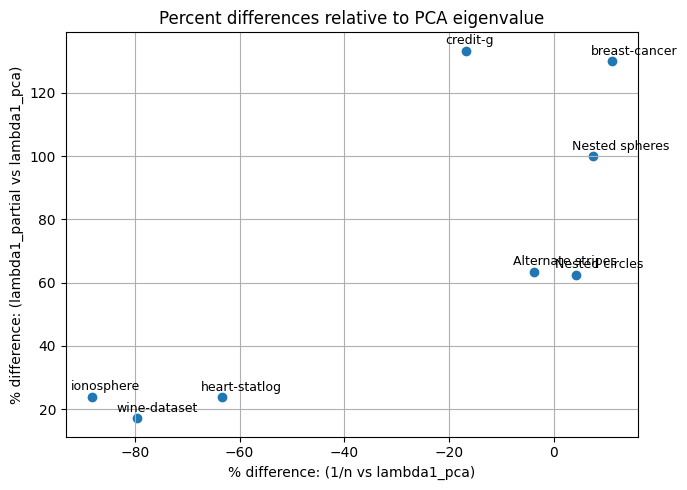

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values)

for i, name in enumerate(datasets):
    plt.annotate(name, (x_values[i]-4, y_partial_to_pca[i]+2), fontsize=9)

plt.xlabel("% difference: (1/n vs lambda1_pca)")
plt.ylabel("% difference: (lambda1_partial vs lambda1_pca)")
plt.title("Percent differences relative to PCA eigenvalue")
plt.grid(True)
plt.tight_layout()
plt.show()